In [69]:
# Import random shit
import numpy as np
import matplotlib.pyplot as plt

# Get that yum yum sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

In [94]:
# Load our data and shit
train_data = np.loadtxt('./training_data.txt', skiprows=1, delimiter=' ')
test_data = np.loadtxt('./test_data.txt', skiprows=1, delimiter=' ')

In [95]:
# Split training and test set into x and y
scaler = StandardScaler()
x_train = scaler.fit_transform(train_data[:, 1:])
y_train = train_data[:, 0]

x_test = scaler.transform(test_data)

In [96]:
len(train_data)

20000

In [98]:
# Try a random forest classifier
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=-1, criterion = 'gini')
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Vary minimum leaf size:
leafs = np.arange(1, 5, 1)
errors = np.empty(len(leafs))

for ind, leaf_size in enumerate(leafs):
    print("Current leaf-size: {0:10.4f}".format(leaf_size))
    clf.set_params(min_samples_leaf=leaf_size)
    errors[ind] = np.mean(cross_val_score(clf, x_train, y_train, cv=ss))

Current leaf-size:     1.0000
Current leaf-size:     2.0000
Current leaf-size:     3.0000
Current leaf-size:     4.0000


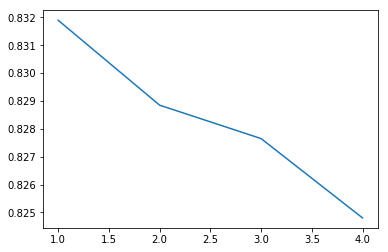

In [99]:
plt.figure()
plt.plot(leafs, errors)

In [100]:
# Try a extra forest classifier
n_estimators = 1000
clf = ExtraTreesClassifier(n_estimators = n_estimators, n_jobs=-1, criterion = 'gini')
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Vary minimum leaf size:
leafs = np.arange(1, 5, 1)
errors2 = np.empty(len(leafs))

for ind, leaf_size in enumerate(leafs):
    print("Current leaf-size: {0:10.4f}".format(leaf_size))
    clf.set_params(min_samples_leaf=leaf_size)
    errors2[ind] = np.mean(cross_val_score(clf, x_train, y_train, cv=ss))

Current leaf-size:     1.0000
Current leaf-size:     2.0000
Current leaf-size:     3.0000
Current leaf-size:     4.0000


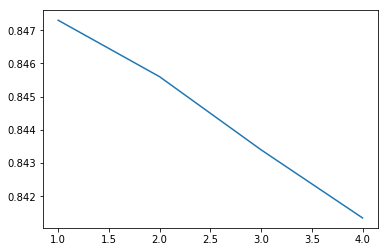

In [101]:
plt.figure()
plt.plot(leafs, errors2)

In [111]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.2)

rand_clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, n_jobs=-1, criterion = 'gini')
extra_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_leaf=1, n_jobs=-1, criterion = 'gini')

rand_clf.fit(x_train1, y_train1)
extra_clf.fit(x_train1, y_train1)

rand_y_test = rand_clf.predict(x_test1)
extra_y_test = extra_clf.predict(x_test1)

print(rand_clf.score(x_test1, y_test1))
print(extra_clf.score(x_test1, y_test1))
print(rand_clf.score(x_train, y_train))
print(extra_clf.score(x_train, y_train))

0.835
0.84625
0.96695
0.9692


In [114]:
rand_clf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, n_jobs=-1, criterion = 'gini')
extra_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_leaf=1, n_jobs=-1, criterion = 'gini')

rand_clf.fit(x_train, y_train)
extra_clf.fit(x_train, y_train)

rand_y_test = rand_clf.predict(x_test)
extra_y_test = extra_clf.predict(x_test)

In [113]:
print(rand_clf.score(x_test1, y_test1))
print(extra_clf.score(x_test1, y_test1))
print(rand_clf.score(x_train, y_train))
print(extra_clf.score(x_train, y_train))

0.835
0.84625
0.96695
0.9692


In [ ]:
def convert(y_test, filename):
    """
    Converts the y_test vector to submission file and saves to filename
    
    Inputs:
        y_test: A (N, ) array with the predicted results for the test set
        filename: String name of file
        
    Outputs:
        None
    """
    
    text_file = np.array([[i+1, int(y_test[i])] for i in range(len(y_test))])
    np.savetxt(filename, text_file, fmt='%d', delimiter=',')
    
    f = open(filename,'r+')
    lines = f.readlines() # read old content
    f.seek(0) # go back to the beginning of the file
    f.write('Id,Prediction\n') # write new content at the beginning
    for line in lines: # write old content after new
        f.write(line)
    f.close()

In [115]:
convert(rand_y_test, 'rand_for_leaf1.txt')
convert(extra_y_test, 'extra_for_leaf1.txt')

In [93]:
convert(rand_clf.predict(x_train), 'rand_for_train.txt')
convert(extra_clf.predict(x_train), 'extra_for_train.txt')